In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
titanic = pd.read_csv("resources/titanic_train.csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## missing data

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

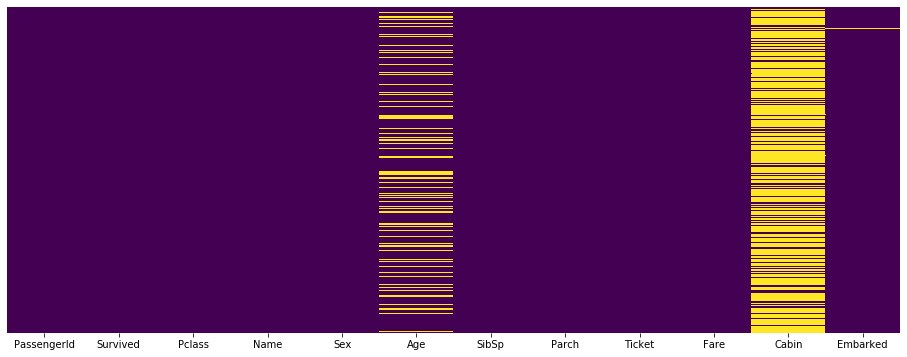

In [7]:
plt.figure(figsize=(16,6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap="viridis")

## we will eliminate columns with too many missing data points and replace values that are responable

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


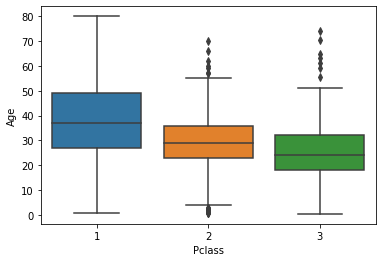

In [9]:
sns.boxplot(x = "Pclass", y = "Age", data=titanic)

## appears the average age of a person on 1st is 38, 2nd  30, and 3rd is 28 so we wil ldeal with the missing data that way

In [10]:
def deal_with_missing(columns):
    pclass = columns[0]
    age = columns[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 28
    else:
        return age
    

## appling our function 

In [11]:
titanic["Age"] = titanic[["Pclass","Age"]].apply(deal_with_missing, axis = 1)

In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

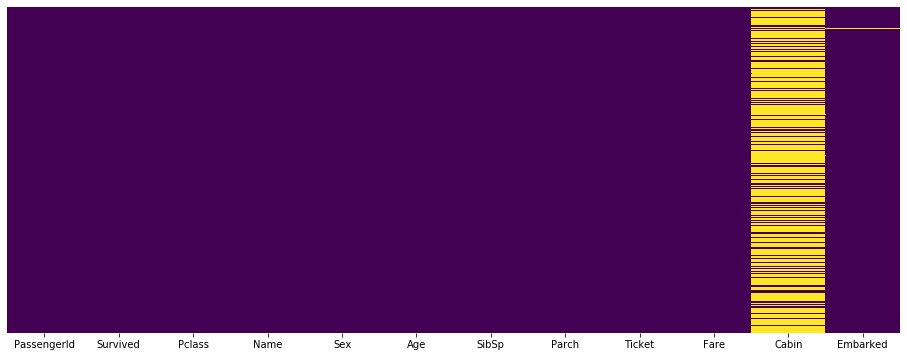

In [13]:
plt.figure(figsize=(16,6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap="viridis")

### removing data 

In [14]:
titanic.drop("Cabin", axis=1, inplace=True)

In [15]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [16]:
titanic.dropna(inplace=True)

In [17]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### getting dummies 

In [18]:
sex = pd.get_dummies(titanic["Sex"], drop_first=True)

In [19]:
titanic["Sex"] = sex

In [20]:
emb = pd.get_dummies(titanic["Embarked"], drop_first=True)

In [21]:
titanic = pd.concat([titanic, emb], axis=1)

In [22]:
titanic.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [23]:
titanic.drop("Embarked", axis=1, inplace=True)

In [24]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,28.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


### Training Data

In [25]:
X = titanic.drop("Survived", axis=1).values
y = titanic["Survived"].values

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scalar = MinMaxScaler()

In [30]:
X_train = scalar.fit_transform(X_train)

In [31]:
X_test = scalar.transform(X_test)

### Developing out ANN 

In [32]:
X_train.shape

(622, 8)

In [33]:
from tensorflow.keras.models import Sequential

In [34]:
from tensorflow.keras.layers import Dense

In [35]:
model =Sequential()
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer="adam")

In [36]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=500)

Train on 622 samples, validate on 267 samples
Epoch 1/500
622/622 [==============================] - 2s 2ms/sample - loss: 0.6849 - val_loss: 0.6770
Epoch 2/500
622/622 [==============================] - 0s 209us/sample - loss: 0.6715 - val_loss: 0.6663
Epoch 3/500
622/622 [==============================] - 0s 217us/sample - loss: 0.6602 - val_loss: 0.6548
Epoch 4/500
622/622 [==============================] - 0s 213us/sample - loss: 0.6486 - val_loss: 0.6433
Epoch 5/500
622/622 [==============================] - 0s 212us/sample - loss: 0.6362 - val_loss: 0.6323
Epoch 6/500
622/622 [==============================] - 0s 211us/sample - loss: 0.6246 - val_loss: 0.6218
Epoch 7/500
622/622 [==============================] - 0s 209us/sample - loss: 0.6137 - val_loss: 0.6115
Epoch 8/500
622/622 [==============================] - 0s 208us/sample - loss: 0.6028 - val_loss: 0.6011
Epoch 9/500
622/622 [==============================] - 0s 210us/sample - loss: 0.5922 - val_loss: 0.5905
Epoch 10/50

Epoch 78/500
622/622 [==============================] - 0s 211us/sample - loss: 0.4318 - val_loss: 0.4067
Epoch 79/500
622/622 [==============================] - 0s 210us/sample - loss: 0.4311 - val_loss: 0.4058
Epoch 80/500
622/622 [==============================] - 0s 214us/sample - loss: 0.4306 - val_loss: 0.4049
Epoch 81/500
622/622 [==============================] - 0s 208us/sample - loss: 0.4304 - val_loss: 0.4050
Epoch 82/500
622/622 [==============================] - 0s 202us/sample - loss: 0.4305 - val_loss: 0.4047
Epoch 83/500
622/622 [==============================] - 0s 204us/sample - loss: 0.4334 - val_loss: 0.4056
Epoch 84/500
622/622 [==============================] - 0s 205us/sample - loss: 0.4312 - val_loss: 0.4026
Epoch 85/500
622/622 [==============================] - 0s 207us/sample - loss: 0.4297 - val_loss: 0.4039
Epoch 86/500
622/622 [==============================] - 0s 235us/sample - loss: 0.4300 - val_loss: 0.4023
Epoch 87/500
622/622 [========================

Epoch 155/500
622/622 [==============================] - 0s 207us/sample - loss: 0.4204 - val_loss: 0.3918
Epoch 156/500
622/622 [==============================] - 0s 197us/sample - loss: 0.4194 - val_loss: 0.3912
Epoch 157/500
622/622 [==============================] - 0s 206us/sample - loss: 0.4194 - val_loss: 0.3909
Epoch 158/500
622/622 [==============================] - 0s 232us/sample - loss: 0.4190 - val_loss: 0.3916
Epoch 159/500
622/622 [==============================] - 0s 212us/sample - loss: 0.4193 - val_loss: 0.3922
Epoch 160/500
622/622 [==============================] - 0s 232us/sample - loss: 0.4198 - val_loss: 0.3924
Epoch 161/500
622/622 [==============================] - 0s 258us/sample - loss: 0.4194 - val_loss: 0.3902
Epoch 162/500
622/622 [==============================] - 0s 218us/sample - loss: 0.4197 - val_loss: 0.3912
Epoch 163/500
622/622 [==============================] - 0s 287us/sample - loss: 0.4202 - val_loss: 0.3900
Epoch 164/500
622/622 [==============

622/622 [==============================] - 0s 223us/sample - loss: 0.4113 - val_loss: 0.3856
Epoch 232/500
622/622 [==============================] - 0s 219us/sample - loss: 0.4124 - val_loss: 0.3859
Epoch 233/500
622/622 [==============================] - 0s 219us/sample - loss: 0.4110 - val_loss: 0.3857
Epoch 234/500
622/622 [==============================] - 0s 218us/sample - loss: 0.4115 - val_loss: 0.3850
Epoch 235/500
622/622 [==============================] - 0s 227us/sample - loss: 0.4105 - val_loss: 0.3862
Epoch 236/500
622/622 [==============================] - 0s 219us/sample - loss: 0.4100 - val_loss: 0.3846
Epoch 237/500
622/622 [==============================] - 0s 225us/sample - loss: 0.4101 - val_loss: 0.3841
Epoch 238/500
622/622 [==============================] - 0s 212us/sample - loss: 0.4109 - val_loss: 0.3865
Epoch 239/500
622/622 [==============================] - 0s 213us/sample - loss: 0.4103 - val_loss: 0.3847
Epoch 240/500
622/622 [============================

622/622 [==============================] - 0s 218us/sample - loss: 0.4037 - val_loss: 0.3817
Epoch 308/500
622/622 [==============================] - 0s 223us/sample - loss: 0.4053 - val_loss: 0.3800
Epoch 309/500
622/622 [==============================] - 0s 216us/sample - loss: 0.4030 - val_loss: 0.3815
Epoch 310/500
622/622 [==============================] - 0s 211us/sample - loss: 0.4032 - val_loss: 0.3817
Epoch 311/500
622/622 [==============================] - 0s 215us/sample - loss: 0.4043 - val_loss: 0.3811
Epoch 312/500
622/622 [==============================] - 0s 223us/sample - loss: 0.4027 - val_loss: 0.3806
Epoch 313/500
622/622 [==============================] - 0s 224us/sample - loss: 0.4037 - val_loss: 0.3797
Epoch 314/500
622/622 [==============================] - 0s 217us/sample - loss: 0.4026 - val_loss: 0.3808
Epoch 315/500
622/622 [==============================] - 0s 223us/sample - loss: 0.4029 - val_loss: 0.3811
Epoch 316/500
622/622 [============================

622/622 [==============================] - 0s 216us/sample - loss: 0.3992 - val_loss: 0.3794
Epoch 384/500
622/622 [==============================] - 0s 216us/sample - loss: 0.3999 - val_loss: 0.3780
Epoch 385/500
622/622 [==============================] - 0s 218us/sample - loss: 0.3998 - val_loss: 0.3804
Epoch 386/500
622/622 [==============================] - 0s 218us/sample - loss: 0.4026 - val_loss: 0.3770
Epoch 387/500
622/622 [==============================] - 0s 215us/sample - loss: 0.4025 - val_loss: 0.3791
Epoch 388/500
622/622 [==============================] - 0s 219us/sample - loss: 0.3985 - val_loss: 0.3782
Epoch 389/500
622/622 [==============================] - 0s 220us/sample - loss: 0.4003 - val_loss: 0.3797
Epoch 390/500
622/622 [==============================] - 0s 215us/sample - loss: 0.3991 - val_loss: 0.3787
Epoch 391/500
622/622 [==============================] - 0s 224us/sample - loss: 0.3988 - val_loss: 0.3775
Epoch 392/500
622/622 [============================

622/622 [==============================] - 0s 235us/sample - loss: 0.3979 - val_loss: 0.3759
Epoch 460/500
622/622 [==============================] - 0s 214us/sample - loss: 0.3972 - val_loss: 0.3751
Epoch 461/500
622/622 [==============================] - 0s 215us/sample - loss: 0.3968 - val_loss: 0.3757
Epoch 462/500
622/622 [==============================] - 0s 248us/sample - loss: 0.3974 - val_loss: 0.3782
Epoch 463/500
622/622 [==============================] - 0s 218us/sample - loss: 0.3968 - val_loss: 0.3762
Epoch 464/500
622/622 [==============================] - 0s 216us/sample - loss: 0.3961 - val_loss: 0.3761
Epoch 465/500
622/622 [==============================] - 0s 217us/sample - loss: 0.3985 - val_loss: 0.3748
Epoch 466/500
622/622 [==============================] - 0s 214us/sample - loss: 0.3962 - val_loss: 0.3750
Epoch 467/500
622/622 [==============================] - 0s 217us/sample - loss: 0.3958 - val_loss: 0.3751
Epoch 468/500
622/622 [============================

## Check performance

In [37]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.684938,0.676995
1,0.671469,0.666299
2,0.660234,0.654772
3,0.648594,0.643307
4,0.636233,0.632250
...,...,...
495,0.394775,0.376707
496,0.394855,0.374708
497,0.394654,0.377115
498,0.394276,0.374380


## model looks to be overfitting..though the predicitons may improve we are overfitting the dat aso lets set a stop at the lowest error of the valus loss

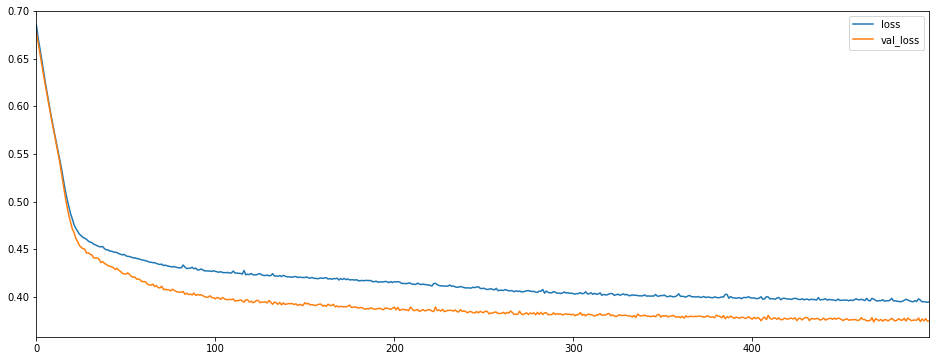

In [38]:
pd.DataFrame(model.history.history).plot(figsize =(16,6))

### model looks really good in terms of the error lets check the predictions

In [39]:
predictions = model.predict_classes(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       163
           1       0.90      0.70      0.79       104

    accuracy                           0.85       267
   macro avg       0.87      0.83      0.84       267
weighted avg       0.86      0.85      0.85       267



In [42]:
print(confusion_matrix(y_test,predictions))

[[155   8]
 [ 31  73]]


In [43]:
model =Sequential()
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer="adam")

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
stop = EarlyStopping(mode="min", patience=25)

In [46]:
model.fit(X_train, y_train, epochs=500, validation_data=(X_test,y_test), callbacks=[stop])

Train on 622 samples, validate on 267 samples
Epoch 1/500
622/622 [==============================] - 1s 2ms/sample - loss: 0.6690 - val_loss: 0.6630
Epoch 2/500
622/622 [==============================] - 0s 217us/sample - loss: 0.6566 - val_loss: 0.6525
Epoch 3/500
622/622 [==============================] - 0s 217us/sample - loss: 0.6476 - val_loss: 0.6443
Epoch 4/500
622/622 [==============================] - 0s 219us/sample - loss: 0.6394 - val_loss: 0.6380
Epoch 5/500
622/622 [==============================] - 0s 216us/sample - loss: 0.6328 - val_loss: 0.6316
Epoch 6/500
622/622 [==============================] - 0s 219us/sample - loss: 0.6259 - val_loss: 0.6248
Epoch 7/500
622/622 [==============================] - 0s 226us/sample - loss: 0.6188 - val_loss: 0.6176
Epoch 8/500
622/622 [==============================] - 0s 222us/sample - loss: 0.6107 - val_loss: 0.6093
Epoch 9/500
622/622 [==============================] - 0s 220us/sample - loss: 0.6017 - val_loss: 0.5988
Epoch 10/50

Epoch 78/500
622/622 [==============================] - 0s 212us/sample - loss: 0.4300 - val_loss: 0.4088
Epoch 79/500
622/622 [==============================] - 0s 210us/sample - loss: 0.4322 - val_loss: 0.4096
Epoch 80/500
622/622 [==============================] - 0s 216us/sample - loss: 0.4288 - val_loss: 0.4100
Epoch 81/500
622/622 [==============================] - 0s 217us/sample - loss: 0.4287 - val_loss: 0.4096
Epoch 82/500
622/622 [==============================] - 0s 218us/sample - loss: 0.4286 - val_loss: 0.4096
Epoch 83/500
622/622 [==============================] - 0s 219us/sample - loss: 0.4283 - val_loss: 0.4094
Epoch 84/500
622/622 [==============================] - 0s 217us/sample - loss: 0.4277 - val_loss: 0.4080
Epoch 85/500
622/622 [==============================] - 0s 223us/sample - loss: 0.4272 - val_loss: 0.4089
Epoch 86/500
622/622 [==============================] - 0s 220us/sample - loss: 0.4277 - val_loss: 0.4086
Epoch 87/500
622/622 [========================

Epoch 155/500
622/622 [==============================] - 0s 220us/sample - loss: 0.4169 - val_loss: 0.3975
Epoch 156/500
622/622 [==============================] - 0s 222us/sample - loss: 0.4170 - val_loss: 0.3988
Epoch 157/500
622/622 [==============================] - 0s 223us/sample - loss: 0.4169 - val_loss: 0.3970
Epoch 158/500
622/622 [==============================] - 0s 226us/sample - loss: 0.4169 - val_loss: 0.3966
Epoch 159/500
622/622 [==============================] - 0s 222us/sample - loss: 0.4178 - val_loss: 0.3985
Epoch 160/500
622/622 [==============================] - 0s 218us/sample - loss: 0.4177 - val_loss: 0.3955
Epoch 161/500
622/622 [==============================] - 0s 225us/sample - loss: 0.4161 - val_loss: 0.3971
Epoch 162/500
622/622 [==============================] - 0s 219us/sample - loss: 0.4165 - val_loss: 0.3963
Epoch 163/500
622/622 [==============================] - 0s 221us/sample - loss: 0.4160 - val_loss: 0.3966
Epoch 164/500
622/622 [==============

622/622 [==============================] - 0s 226us/sample - loss: 0.4142 - val_loss: 0.3919
Epoch 232/500
622/622 [==============================] - 0s 226us/sample - loss: 0.4162 - val_loss: 0.3975
Epoch 233/500
622/622 [==============================] - 0s 216us/sample - loss: 0.4127 - val_loss: 0.3913
Epoch 234/500
622/622 [==============================] - 0s 215us/sample - loss: 0.4125 - val_loss: 0.3918
Epoch 235/500
622/622 [==============================] - 0s 216us/sample - loss: 0.4118 - val_loss: 0.3935
Epoch 236/500
622/622 [==============================] - 0s 216us/sample - loss: 0.4121 - val_loss: 0.3933
Epoch 237/500
622/622 [==============================] - 0s 214us/sample - loss: 0.4119 - val_loss: 0.3934
Epoch 238/500
622/622 [==============================] - 0s 217us/sample - loss: 0.4123 - val_loss: 0.3928
Epoch 239/500
622/622 [==============================] - 0s 225us/sample - loss: 0.4134 - val_loss: 0.3922
Epoch 240/500
622/622 [============================

## performance

In [47]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.668998,0.662982
1,0.656631,0.652466
2,0.647604,0.644259
3,0.639412,0.638031
4,0.632824,0.631619
...,...,...
276,0.410807,0.391689
277,0.410298,0.392085
278,0.410451,0.392418
279,0.410603,0.392124


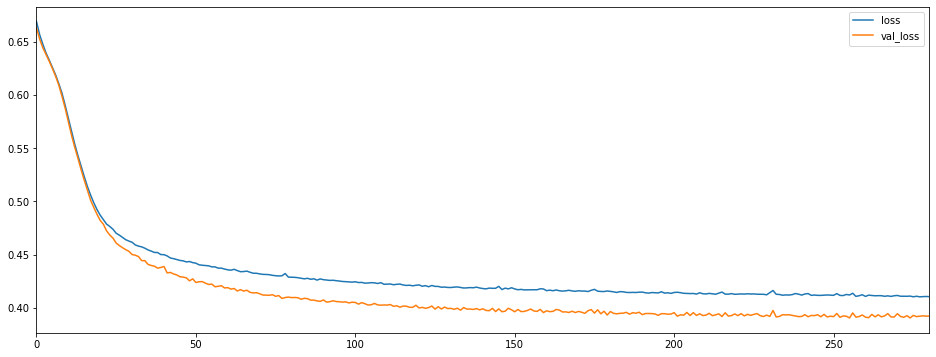

In [48]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

In [49]:
pred = model.predict_classes(X_test)

In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       163
           1       0.89      0.69      0.78       104

    accuracy                           0.85       267
   macro avg       0.86      0.82      0.83       267
weighted avg       0.85      0.85      0.84       267



## lets add a Drop instnce at each neuron

In [51]:
from tensorflow.keras.layers import Dropout

In [64]:
model =Sequential()
model.add(Dense(units = 20, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 20, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer="adam")

In [65]:
model.fit(X_train, y_train, epochs=500, validation_data=(X_test,y_test), callbacks=[stop])

Train on 622 samples, validate on 267 samples
Epoch 1/500
622/622 [==============================] - 1s 2ms/sample - loss: 0.6586 - val_loss: 0.6471
Epoch 2/500
622/622 [==============================] - 0s 231us/sample - loss: 0.6589 - val_loss: 0.6351
Epoch 3/500
622/622 [==============================] - 0s 235us/sample - loss: 0.6424 - val_loss: 0.6274
Epoch 4/500
622/622 [==============================] - 0s 230us/sample - loss: 0.6297 - val_loss: 0.6174
Epoch 5/500
622/622 [==============================] - 0s 227us/sample - loss: 0.6340 - val_loss: 0.6092
Epoch 6/500
622/622 [==============================] - 0s 234us/sample - loss: 0.6193 - val_loss: 0.6017
Epoch 7/500
622/622 [==============================] - 0s 233us/sample - loss: 0.6157 - val_loss: 0.5947
Epoch 8/500
622/622 [==============================] - 0s 229us/sample - loss: 0.6247 - val_loss: 0.5876
Epoch 9/500
622/622 [==============================] - 0s 238us/sample - loss: 0.6130 - val_loss: 0.5803
Epoch 10/50

Epoch 78/500
622/622 [==============================] - 0s 257us/sample - loss: 0.4753 - val_loss: 0.4271
Epoch 79/500
622/622 [==============================] - 0s 271us/sample - loss: 0.4856 - val_loss: 0.4255
Epoch 80/500
622/622 [==============================] - 0s 259us/sample - loss: 0.4849 - val_loss: 0.4251
Epoch 81/500
622/622 [==============================] - 0s 259us/sample - loss: 0.4597 - val_loss: 0.4231
Epoch 82/500
622/622 [==============================] - 0s 247us/sample - loss: 0.5113 - val_loss: 0.4246
Epoch 83/500
622/622 [==============================] - 0s 247us/sample - loss: 0.4836 - val_loss: 0.4252
Epoch 84/500
622/622 [==============================] - 0s 244us/sample - loss: 0.4792 - val_loss: 0.4315
Epoch 85/500
622/622 [==============================] - 0s 250us/sample - loss: 0.4862 - val_loss: 0.4287
Epoch 86/500
622/622 [==============================] - 0s 248us/sample - loss: 0.4710 - val_loss: 0.4245
Epoch 87/500
622/622 [========================

Epoch 155/500
622/622 [==============================] - 0s 239us/sample - loss: 0.4571 - val_loss: 0.4099
Epoch 156/500
622/622 [==============================] - 0s 235us/sample - loss: 0.4638 - val_loss: 0.4084
Epoch 157/500
622/622 [==============================] - 0s 246us/sample - loss: 0.4578 - val_loss: 0.4115
Epoch 158/500
622/622 [==============================] - 0s 263us/sample - loss: 0.4629 - val_loss: 0.4111
Epoch 159/500
622/622 [==============================] - 0s 253us/sample - loss: 0.4568 - val_loss: 0.4103
Epoch 160/500
622/622 [==============================] - 0s 247us/sample - loss: 0.4567 - val_loss: 0.4087
Epoch 161/500
622/622 [==============================] - 0s 242us/sample - loss: 0.4608 - val_loss: 0.4070
Epoch 162/500
622/622 [==============================] - 0s 230us/sample - loss: 0.4610 - val_loss: 0.4089
Epoch 163/500
622/622 [==============================] - 0s 244us/sample - loss: 0.4786 - val_loss: 0.4100
Epoch 164/500
622/622 [==============

In [66]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.658575,0.647102
1,0.658920,0.635136
2,0.642416,0.627388
3,0.629685,0.617355
4,0.633954,0.609213
...,...,...
181,0.475295,0.410767
182,0.465515,0.411392
183,0.463606,0.412098
184,0.476709,0.412161


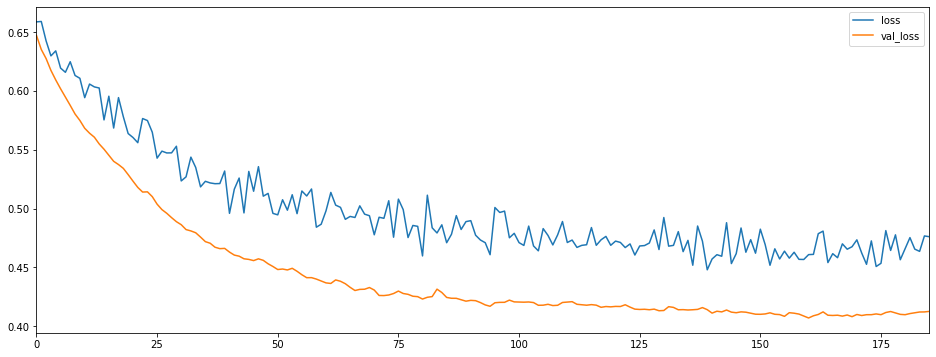

In [67]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

In [68]:
pree = model.predict_classes(X_test)

In [69]:
print(classification_report(y_test,pree))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       163
           1       0.90      0.61      0.72       104

    accuracy                           0.82       267
   macro avg       0.85      0.78      0.80       267
weighted avg       0.83      0.82      0.81       267

